In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import dok_matrix, csr_matrix

### Problem 3

#### 3.2

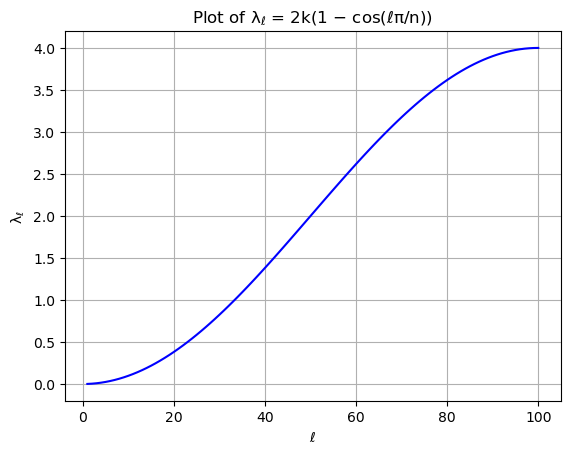

In [2]:
k = 1
n = 100

l = np.arange(1, n+1)

lambda_values = 2 * k * (1 - np.cos(l * np.pi / n))

plt.plot(l, lambda_values, c='b')
plt.xlabel('$\ell$')
plt.ylabel('λ$_{\ell}$')
plt.title('Plot of λ$_{\ell}$ = 2k(1 − cos($\ell$π/n))')
plt.grid(True)
plt.show()


### Problem 4

#### 4.1

In [3]:
def spring_matrix(k):
    n = len(k)
    
    #zero array of shape (n-1,n-1)
    A=dok_matrix((n-1,n-1))
    
    #zero'th row
    A[0,0]= k[0] + k[1]
    A[0,1]= -k[1]
    
    #rows 1 to n-3
    for i in range(1,n-2):
        A[i,i-1]= -k[i]
        A[i,i]= k[i] + k[i+1]
        A[i,i+1]= -k[i+1]
        
    #row n-1
    A[-1,-2]= -k[-2]
    A[-1,-1]= k[-2] + k[-1]
    
    return csr_matrix(A)

In [4]:
M = spring_matrix(np.array([1,1,1,1,1,1]))
M.todense()

matrix([[ 2., -1.,  0.,  0.,  0.],
        [-1.,  2., -1.,  0.,  0.],
        [ 0., -1.,  2., -1.,  0.],
        [ 0.,  0., -1.,  2., -1.],
        [ 0.,  0.,  0., -1.,  2.]])

In [5]:
M = spring_matrix(np.array([10,9,8,7,6,5,4]))
M.todense()

matrix([[19., -9.,  0.,  0.,  0.,  0.],
        [-9., 17., -8.,  0.,  0.,  0.],
        [ 0., -8., 15., -7.,  0.,  0.],
        [ 0.,  0., -7., 13., -6.,  0.],
        [ 0.,  0.,  0., -6., 11., -5.],
        [ 0.,  0.,  0.,  0., -5.,  9.]])

In [6]:
M = spring_matrix(np.array([4,4,4,4,4,4,4]))
M.todense()

matrix([[ 8., -4.,  0.,  0.,  0.,  0.],
        [-4.,  8., -4.,  0.,  0.,  0.],
        [ 0., -4.,  8., -4.,  0.,  0.],
        [ 0.,  0., -4.,  8., -4.,  0.],
        [ 0.,  0.,  0., -4.,  8., -4.],
        [ 0.,  0.,  0.,  0., -4.,  8.]])

#### 4.2

In [7]:
def spring_vector(F, k, r):
    n = len(k)
    b = np.zeros(n-1)
    
    #set entries 0 to n-3 
    for i in range(1,n-2) :
        b[i] = F[i] + k[i] * r[i] - k[i+1] * r[i+1]
    
    #set entry n-2
    b[-1] = F[-1] + k[-1] + k[-2] * r[-2] - k[-1]* r[-1]
    return b

In [8]:
b1 = spring_vector([1,1,1,1], [1,1,1,1,1], [5,5,5,5,5])
print(b1)
b2 = spring_vector([2,3,2,3], [1,1,1,1,1], [2,4,5,4,2])
print(b2)

[0. 1. 1. 2.]
[0. 2. 3. 6.]


#### 4.3

In [9]:
def infinity_norm(matrix):
    row_sums = np.sum(np.abs(matrix), axis=1)  # Compute the sum of absolute values for each row
    max_row_sum = np.max(row_sums)  # Find the maximum sum of absolute values
    return max_row_sum

#test
matrix = np.array([[1, 2, 3],
                   [-4, 5, 6],
                   [7, -8, 9]])

infinity_norm(matrix)

24

#### 4.4

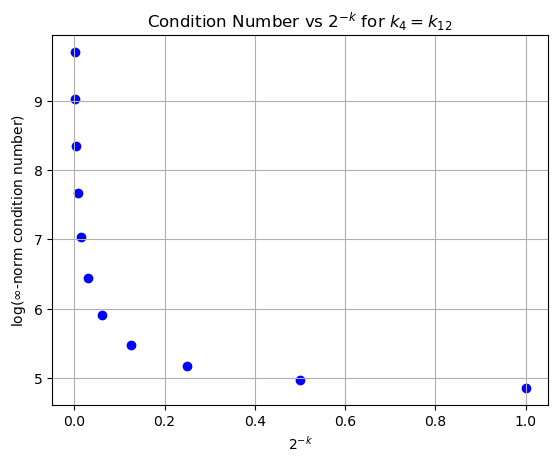

In [29]:
n = 16
r = np.full(n, 1/16)
k = np.ones(n)

condition_numbers = []

for k_exp in range(11):
    k4 = k12 = 2.**(-k_exp)
    k[4] = k4
    k[12] = k12
    A = spring_matrix(k).todense()
    inv_A = np.linalg.inv(A)
    condition_numbers.append(infinity_norm(A) * infinity_norm(inv_A)) 
    
plt.scatter(2.**(-np.arange(11)), np.log(condition_numbers), c='b')
plt.xlabel('$2^{-k}$')
plt.ylabel('log($\infty$-norm condition number)')
plt.title('Condition Number vs $2^{-k}$ for $k_4 = k_{12}$')
plt.grid(True)
plt.show()

### Problem 7

In [11]:
def csr_matrix_vector_product(NC, V, C, R, v):
    Mv = np.zeros(len(R) - 1)
    for i in range(len(R) - 1):
        start = R[i]
        end = R[i + 1]
        for j in range(start, end):
            Mv[i] += V[j] * v[C[j]]
    return Mv

def standard_matrix_vector_product(matrix, vector):
    return np.dot(matrix, vector)

In [12]:
# Example 1
NC = 3
V = [2, 1, 3, 4, 5]
C = [0, 2, 1, 0, 2]
R = [0, 2, 3, 5]
v = np.array([1, 2, 3])

M = np.zeros((len(R) - 1, NC))
for i in range(len(R) - 1):
    start = R[i]
    end = R[i + 1]
    for j in range(start, end):
        M[i, C[j]] = V[j]

result_standard = standard_matrix_vector_product(M, v)

result_csr = csr_matrix_vector_product(NC, V, C, R, v)

print("Example 1 (Standard method):", result_standard)
print("Example 1 (CSR method):", result_csr)

# Example 2
NC = 4
V = [1, 2, 3, 4, 5, 6, 7, 8, 9]
C = [0, 1, 2, 1, 2, 3, 0, 2, 3]
R = [0, 3, 6, 9]
v = np.array([1, 2, 3, 4])

M = np.zeros((len(R) - 1, NC))
for i in range(len(R) - 1):
    start = R[i]
    end = R[i + 1]
    for j in range(start, end):
        M[i, C[j]] = V[j]

result_standard = standard_matrix_vector_product(M, v)

result_csr = csr_matrix_vector_product(NC, V, C, R, v)

print("Example 2 (Standard method):", result_standard)
print("Example 2 (CSR method):", result_csr)

# Example 3
NC = 3
V = [3, 1, 2, 4, 5]
C = [0, 2, 1, 0, 2]
R = [0, 2, 3, 5]
v = np.array([2, 3, 1])

M = np.zeros((len(R) - 1, NC))
for i in range(len(R) - 1):
    start = R[i]
    end = R[i + 1]
    for j in range(start, end):
        M[i, C[j]] = V[j]

result_standard = standard_matrix_vector_product(M, v)

result_csr = csr_matrix_vector_product(NC, V, C, R, v)

print("Example 3 (Standard method):", result_standard)
print("Example 3 (CSR method):", result_csr)

Example 1 (Standard method): [ 5.  6. 19.]
Example 1 (CSR method): [ 5.  6. 19.]
Example 2 (Standard method): [14. 47. 67.]
Example 2 (CSR method): [14. 47. 67.]
Example 3 (Standard method): [ 7.  6. 13.]
Example 3 (CSR method): [ 7.  6. 13.]
